# Let's See How Many Trees there are in the Forests

This notebook shows a subplot for each (dataset, forestType, variant) triple where

- dataset $\in$ {adult, wine-quality}
- forestType $\in$ {ET, RF}
- variant $\in$ {WithLeafEdgesWithSplitValues, NoLeafEdgesWithSplitValues}.

Each subplot shows a the number of frequent subtrees found or the maximum size of any such frequent subtree as a function of the frequency threshold in the forest database.

Here, a tree is frequent if it occurs as a rooted subtree in at least $threshold$ many decision trees in the random forest.



### Input Data

These are the relevant lines producing the data processed in this notebook:

    echo "processing threshold ${threshold} for ${f}
    ./lwgr -e rootedTrees -m bfs -t ${threshold} -p 10 \
    -o forests/rootedFrequentTrees/${dataset}/${variant}/`basename ${f} .graph`_t${threshold}.patterns 
    < ${f}
    > forests/rootedFrequentTrees/${dataset}/${variant}/`basename ${f} .graph`_t${threshold}.features
    2> forests/rootedFrequentTrees/${dataset}/${variant}/`basename ${f} .graph`_t${threshold}.logs


In [3]:
import os
import matplotlib.pyplot as pl
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

## Plot Number of Frequent Subtrees

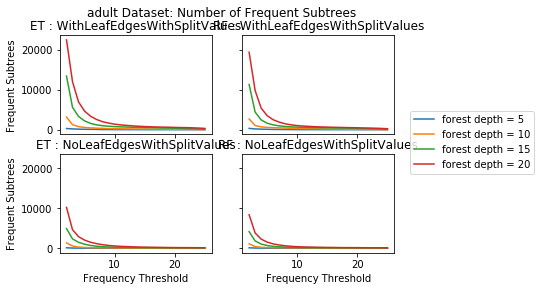

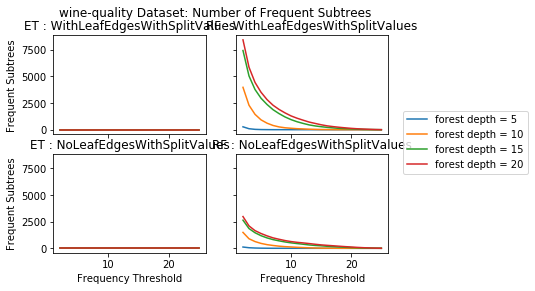

In [2]:
# plot number of frequent subtrees
for dataset in ['adult', 'wine-quality']:
    fig, axes = pl.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
    fig.suptitle(dataset + ' Dataset: Number of Frequent Subtrees')
    x = -1
    y = -1
    for variant in ['WithLeafEdgesWithSplitValues', 'NoLeafEdgesWithSplitValues']:
        x = (x + 1) % 2        
        for forestType in ['ET', 'RF']:
            y = (y + 1) % 2
            subplot = axes[x][y]
            for depth in ['5', '10', '15', '20']:
                values = list()
                for threshold in range(2, 26):
                    filename = os.path.join('forests', 'rootedFrequentTrees', dataset, variant, 
                                            forestType + '_' + depth + '_t' + str(threshold) + '.patterns')
                    # count number of patterns (i.e., lines in the pattern file)
                    try:
                        f = open(filename)
                        value = sum(1 for line in f)
                        f.close()
                    except:
                        value = -1
                    values.append(value)
                        
                # plot it    
                subplot.plot(range(2, 26), values, label='forest depth = ' + str(depth))
                subplot.set_title(forestType + ' : ' + variant)
            
            if x == 1:
                subplot.set_xlabel('Frequency Threshold')
            if y == 0:
                subplot.set_ylabel('Frequent Subtrees')
    
    # colors are identical in all subplots due to same order of depth enumeration. Hence, this works:
    subplot.legend(loc=(1.1, 0.8))
    pl.show()            

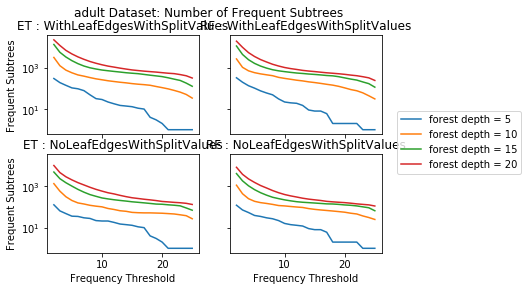

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


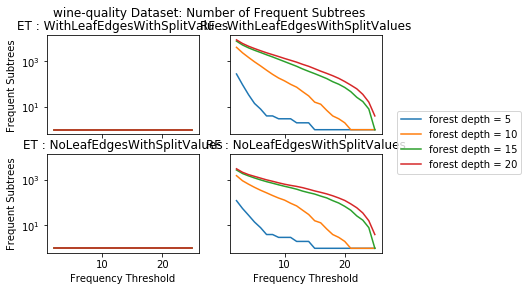

In [3]:
# plot number of frequent subtrees with log scale on yaxis
for dataset in ['adult', 'wine-quality']:
    fig, axes = pl.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
    fig.suptitle(dataset + ' Dataset: Number of Frequent Subtrees')
    x = -1
    y = -1
    for variant in ['WithLeafEdgesWithSplitValues', 'NoLeafEdgesWithSplitValues']:
        x = (x + 1) % 2        
        for forestType in ['ET', 'RF']:
            y = (y + 1) % 2
            subplot = axes[x][y]
            for depth in ['5', '10', '15', '20']:
                values = list()
                for threshold in range(2, 26):
                    filename = os.path.join('forests', 'rootedFrequentTrees', dataset, variant, 
                                            forestType + '_' + depth + '_t' + str(threshold) + '.patterns')
                    # count number of patterns (i.e., lines in the pattern file)
                    try:
                        f = open(filename)
                        value = sum(1 for line in f)
                        f.close()
                    except:
                        value = -1
                    values.append(value)
                        
                # plot it    
                subplot.plot(range(2, 26), values, label='forest depth = ' + str(depth))
                subplot.set_title(forestType + ' : ' + variant)
                subplot.set_yscale('log')
            
            if x == 1:
                subplot.set_xlabel('Frequency Threshold')
            if y == 0:
                subplot.set_ylabel('Frequent Subtrees')
    
    # colors are identical in all subplots due to same order of depth enumeration. Hence, this works:
    subplot.legend(loc=(1.1, 0.8))
    pl.show()  

## Plot Maximum Pattern Size

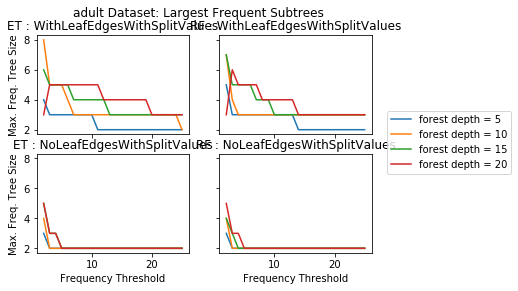

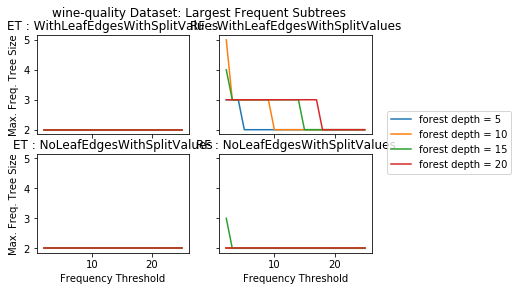

In [4]:
# plot number of vertices in largest frequent subtree
for dataset in ['adult', 'wine-quality']:
    fig, axes = pl.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
    fig.suptitle(dataset + ' Dataset: Largest Frequent Subtrees')
    x = -1
    y = -1
    for variant in ['WithLeafEdgesWithSplitValues', 'NoLeafEdgesWithSplitValues']:
        x = (x + 1) % 2        
        for forestType in ['ET', 'RF']:
            y = (y + 1) % 2
            subplot = axes[x][y]
            for depth in ['5', '10', '15', '20']:
                values = list()
                for threshold in range(2, 26):
                    filename = os.path.join('forests', 'rootedFrequentTrees', dataset, variant, 
                                            forestType + '_' + depth + '_t' + str(threshold) + '.logs')
                    # parse log file
                    try:
                        f = open(filename)
                        value = 0

                        for line in f:
                            if line.startswith('Number of frequent vertices: '):
                                if (int(line.split(': ')[1]) > 0):
                                    value = 1
                            if line.startswith('Number of frequent edges: '):
                                if (int(line.split(': ')[1]) > 0):
                                    value = 2
                            if line.startswith('Processing patterns with '):
                                value = int(line.split(' ')[3])
                                fpFound = False
                            if line.startswith('frequent patterns: '):
                                if (int(line.split(': ')[1]) > 0):
                                    fpFound = True
                        # the log file contains information about the last level of patterns:
                        # either the algorithm stopped due to the max pattern size parameter
                        # or due to no frequent trees on that level.
                        # in the first case, the max pattern size is the last number parsed in the third if
                        # in the second case, the max pattern size is the last number parsed in the third if minus 1 
                        if (value > 2) and not fpFound:
                            value -= 1
                        f.close()
                    except:
                        print('Parsing error at ' + filename)
                        value = -1
                    values.append(value)
                        
                # plot it    
                subplot.plot(range(2, 26), values, label='forest depth = ' + str(depth))
                subplot.set_title(forestType + ' : ' + variant)
            
            if x == 1:
                subplot.set_xlabel('Frequency Threshold')
            if y == 0:
                subplot.set_ylabel('Max. Freq. Tree Size')
    
    # colors are identical in all subplots due to same order of depth enumeration. Hence, this works:
    subplot.legend(loc=(1.1, 0.8))
    pl.show()  

# Plot Patterns of fixed Size

In [15]:
# plot patterns of a certain size
def plotSizeXPatterns(patternsize=5):
    for dataset in ['adult', 'wine-quality']:
        fig, axes = pl.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
        fig.suptitle(dataset + ' Dataset: Number of Frequent Rooted Subtrees of size 6')
        x = -1
        y = -1
        for variant in ['WithLeafEdgesWithSplitValues', 'NoLeafEdgesWithSplitValues']:
            x = (x + 1) % 2        
            for forestType in ['ET', 'RF']:
                y = (y + 1) % 2
                subplot = axes[x][y]
                for depth in ['5', '10', '15', '20']:
                    values = list()
                    for threshold in range(2, 26):
                        filename = os.path.join('forests', 'rootedFrequentTrees', dataset, variant, 
                                                forestType + '_' + depth + '_t' + str(threshold) + '.logs')
                        # parse log file
                        try:
                            f = open(filename)
                            value = 0
                            inSelectedLevel = False

                            for line in f:
                                if line.startswith('Processing patterns with ' + str(patternsize) + ' vertices'):
                                    inSelectedLevel = True
                                if inSelectedLevel:
                                    if line.startswith('frequent patterns: '):
                                        value  = int(line.split(': ')[1])
                                        break

                            f.close()
                        except:
                            print('Parsing error at ' + filename)
                            value = -1
                        values.append(value)

                    # plot it --- starting with patterns of frequency at least 3, as there were computation problems for t-2
                    subplot.plot(range(3, 26), values[1:], label='forest depth = ' + str(depth))
                    subplot.set_title(forestType + ' : ' + variant)

                if x == 1:
                    subplot.set_xlabel('Frequency Threshold')
                if y == 0:
                    subplot.set_ylabel('# size ' + str(patternsize) + ' Patterns')

        # colors are identical in all subplots due to same order of depth enumeration. Hence, this works:
        subplot.legend(loc=(1.1, 0.8))
        pl.show()  

patterns of size 7


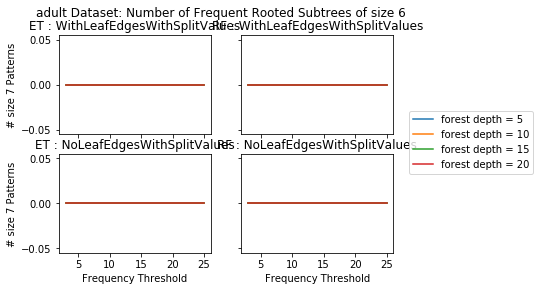

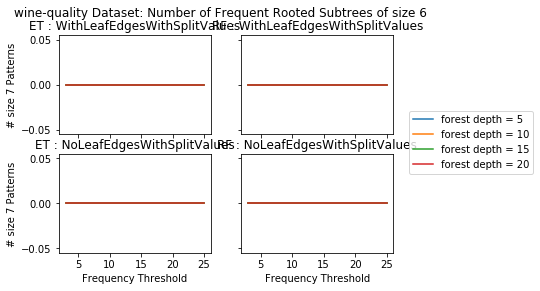

patterns of size 6


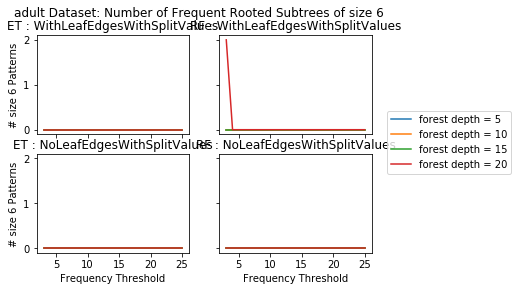

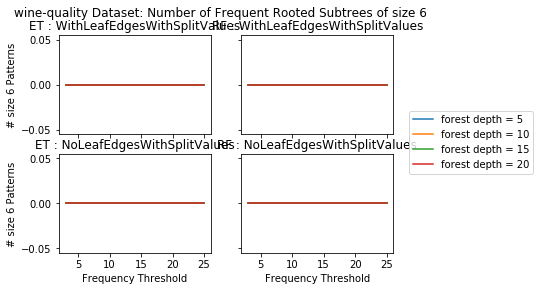

patterns of size 5


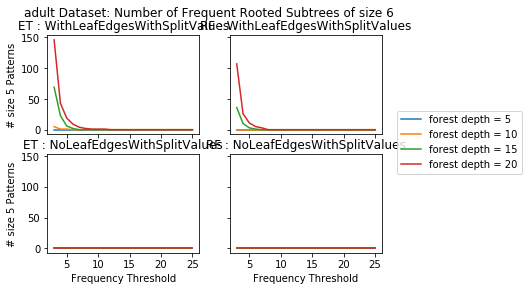

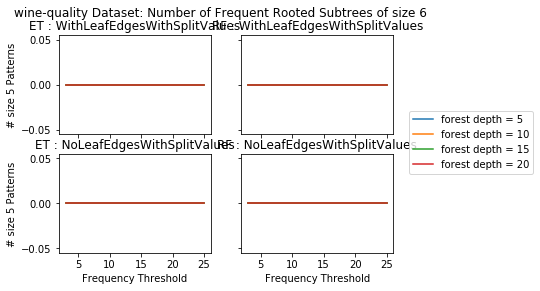

patterns of size 4


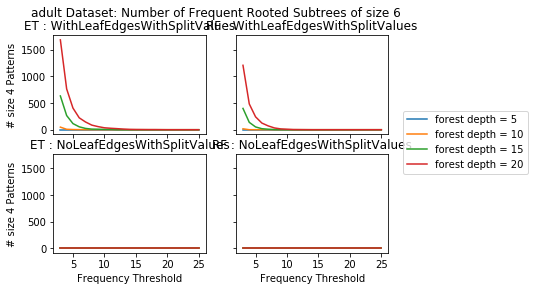

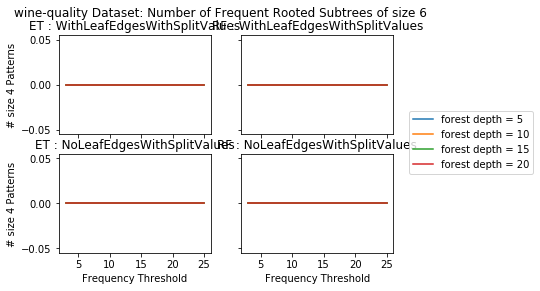

patterns of size 3


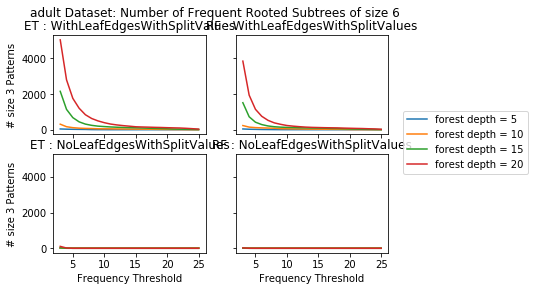

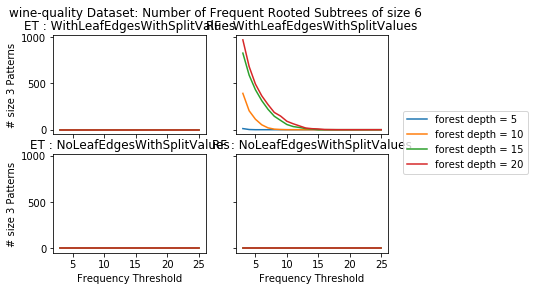

patterns of size 2


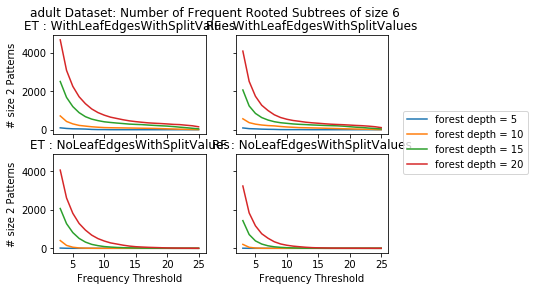

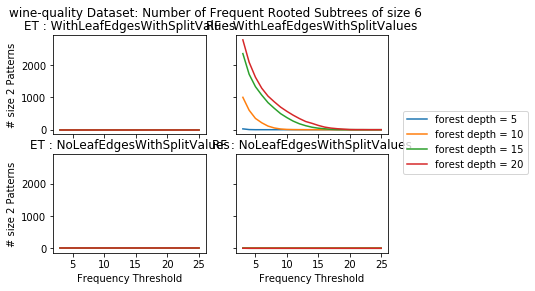

In [16]:
for patternsize in range(7,1,-1):
    print('patterns of size ' + str(patternsize))
    plotSizeXPatterns(patternsize)

In [12]:
# print count of patterns of size six
def printSizeXPatterns(patternsize=5):
    for dataset in ['adult', 'wine-quality']:
        print('\n\n' + dataset + ' Dataset: Number of Frequent Rooted Subtrees of size ' + str(patternsize) 
              + ' (for thresholds 2..25)')
        x = -1
        y = -1
        for variant in ['WithLeafEdgesWithSplitValues', 'NoLeafEdgesWithSplitValues']:
            x = (x + 1) % 2        
            for forestType in ['ET', 'RF']:
                y = (y + 1) % 2

                # print header
                print('\n' + forestType + ' : ' + variant)
                for depth in ['5', '10', '15', '20']:


                    values = list()
                    for threshold in range(2, 26):
                        filename = os.path.join('forests', 'rootedFrequentTrees', dataset, variant, 
                                                forestType + '_' + depth + '_t' + str(threshold) + '.logs')
                        # parse log file
                        try:
                            f = open(filename)
                            value = 0
                            inSelectedLevel = False

                            for line in f:
                                if line.startswith('Processing patterns with ' + str(patternsize) + ' vertices'):
                                    inSelectedLevel = True
                                if inSelectedLevel:
                                    if line.startswith('frequent patterns: '):
                                        value  = int(line.split(': ')[1])
                                        break

                            f.close()
                        except:
                            print('Parsing error at ' + filename)
                            value = -1
                        values.append(value)

                    # print it    
                    print('forest depth = ' + str(depth) + ':\t' + str(values))

In [14]:
for patternsize in range(7,1,-1):
    print('\n\npatterns of size ' + str(patternsize))
    printSizeXPatterns(patternsize)



patterns of size 7


adult Dataset: Number of Frequent Rooted Subtrees of size 7 (for thresholds 2..25)

ET : WithLeafEdgesWithSplitValues
forest depth = 5:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
forest depth = 10:	[6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
forest depth = 15:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
forest depth = 20:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

RF : WithLeafEdgesWithSplitValues
forest depth = 5:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
forest depth = 10:	[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
forest depth = 15:	[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
forest depth = 20:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

ET : NoLeafEdgesWithSplitValues
forest depth = 5:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Preliminary Interpretation

#### ER 
- on the wine-quality dataset (which has real-valued features) there are now only very few frequent trees. In the extremely randomized version there are actually none. This is most likely du to the selection mechanism for the threshold in the ER forest type: the split value is drawn randomly from a range. 
- on the adult dataset, interestingly there are some frequent subtrees in the ER forest type. I didn't look at the split values, yet. If they were also randomly drawn from a real valued range, then there shouldn't be any frequent trees, as well...

#### RF
- As far as I can see, the implementation of the Random Forests. splits at existing values in the training data. These are integers in adult (some are actually categorical) and reals in wine-quality. Hence, there are only so many possible split values, defined by the training data.
- It seems that in the RF forest type, there are less frequent patterns if we incorporate the split values in the vertex labels than if we don't. This was to be expected.
- There are significantly more frequent tree patterns in adult than in wine-quality. This is *inverse* to the situation where we don't include the split values in the labels. (see the notebook 'Results for Frequent Rooted Subtrees.ipynb' for comparison.
- for adult: there re frequent patterns size 4-5 for higher frequency thresholds for RF with leaf edges
- for wine-quality: there are frequent patterns for higher frequency thresholds only for size 3 for RF with leaf edges.